In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models
import skimage
from skimage import io
import os
import glob
import numpy as np
from skimage import exposure, measure
from skimage.transform import rotate
from skimage.measure import compare_ssim as ssim
import re
from torch.utils.data import Dataset
from cellvision_lib import get_model_data_splits
import pickle
import matplotlib.pylab as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/gpfs/share/skynet/apps/anaconda3/envs/pytorch-env/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [16]:
orig_ssim = np.array([0.02227966944562705,
0.04004126293771672,
0.3744573130906787,
0.5745193565500439,
0.6350055677121377])

orig_ssim_stdev = np.array([
0.013718100514093128,
0.025023946340376767,
0.13768481659650753, 
0.16474886224241161, 
0.16292997928902211
])

In [26]:
model_ssim = np.array([0.5831881658009966, 0.7114271007196467,0.6526727714344852,  0.6887818552370373,0.6229781239159538])
model_ssim_stdev = np.array([0.11296518717, 0.10722905872, 0.13423237190, 0.13786460522, 0.16978320364])

In [27]:
orig_nmse = np.array([0.7811956872901828,
0.718703593768004, 
0.24514785291683938, 
0.046872663802475734,
0.008479559198575584])

orig_nmse_stdev = np.array([
0.03091226666557633,
0.03460533902503676,
0.021285165097689244,
0.00905198829622059,
0.002400736845490537
])

In [28]:
model_nmse = np.array([0.04760294572818723, 0.054592031410666084, 0.027057195114685975, 0.011184392704987797, 0.029478747030779025])
model_nmse_stdev = np.array([0.02079662403, 0.0299598775, 0.0114372677, 0.0039958934, 0.0060480437])

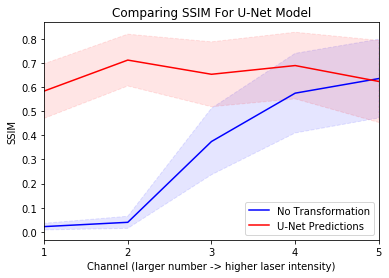

In [34]:
# Comparing SSIM for denoising
plt.plot(list(range(1, 6)), orig_ssim, label="No Transformation", color='blue') 
plt.plot(list(range(1, 6)), model_ssim , label="U-Net Predictions", color='red')

plt.fill_between(list(range(1, 6)), orig_ssim + orig_ssim_stdev, orig_ssim -orig_ssim_stdev, 
                 color="blue", linestyle="--", alpha=0.1)

plt.fill_between(list(range(1, 6)), model_ssim + model_ssim_stdev, model_ssim -model_ssim_stdev, 
                 color="red", linestyle="--", alpha=0.1)



plt.title('Comparing SSIM For U-Net Model')
plt.legend(loc = 'lower right')

plt.xlim([1, 5])
plt.axes().set_xticks(list(range(1, 6)), minor=False)

plt.ylabel('SSIM')
plt.xlabel('Channel (larger number -> higher laser intensity)')
plt.show()

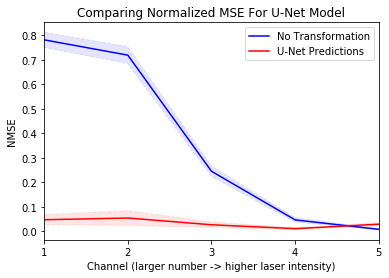

In [32]:
# Comparing MSE for denoising
plt.plot(list(range(1, 6)), orig_nmse, label="No Transformation", color='blue') 
plt.plot(list(range(1, 6)), model_nmse , label="U-Net Predictions", color='red') 

plt.fill_between(list(range(1, 6)), orig_nmse + orig_nmse_stdev, orig_nmse -orig_nmse_stdev, 
                 color="blue", linestyle="--", alpha=0.1)

plt.fill_between(list(range(1, 6)), model_nmse + model_nmse_stdev, model_nmse -model_nmse_stdev, 
                 color="red", linestyle="--", alpha=0.1)


plt.title('Comparing Normalized MSE For U-Net Model')
plt.legend(loc = 'upper right')

plt.xlim([1, 5])
plt.axes().set_xticks(list(range(1, 6)), minor=False)

plt.ylabel('NMSE')
plt.xlabel('Channel (larger number -> higher laser intensity)')
plt.show()